In [11]:
from astropy import constants as c
from astropy import units as u
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
# Read fixed-width formatted (fwf) data file.
widths = [28, 12, 11, 8, 8, 9, 9, 10, 10, 9, 5, 11, 6, 9, 14, 10, 7, 6, 8, 7,
    8, 9, 9, 9, 6]
columns = ['DIST', 'Mv', 'BOL-LUM', 'RADIUS', 'Unnamed: 19', 'Teff']
df = pd.read_fwf('../data/nearest-stars', widths=widths, usecols=columns)
df = df.drop([0, 1]).reset_index(drop=True)
df = df.rename(columns={'Unnamed: 19': 'Radunit'})

In [13]:
# Convert to number from string.
columns = ['Teff', 'Mv', 'DIST', 'RADIUS', 'BOL-LUM']
for col in columns:
    df[col] = df[col].str.replace(r'[a-zA-Z]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [14]:
# Radius conversion from Sun, Jupiter, and Earth.
w = df['Radunit'] == 'Rj'
df.loc[w, 'RADIUS'] /= 9.9604
w = df['Radunit'] == 'Re'
df.loc[w, 'RADIUS'] /= 109.18

In [88]:
# Temperature-Luminosity Relation lines.
teff = np.linspace(0, 1e4)
coef = (4 * np.pi * c.sigma_sb).to(u.W * u.K**-4 * u.R_sun**-2)
lsun = coef * pow(teff * u.K, 4)
rsun = np.array([0.001, 0.01, 0.1, 1, 10, 100]) * u.R_sun

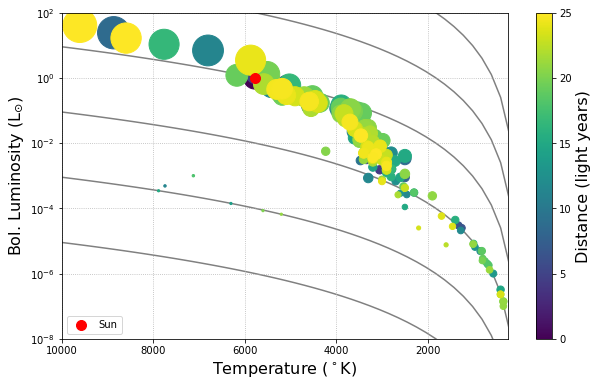

In [109]:
plt.figure(figsize=(10, 6))

# Plot Temperature-Luminosity Relation lines
for r in rsun:
    plt.plot(teff, (lsun * pow(r, 2)).to(u.L_sun), c='grey', zorder=0)

# Plot
plt.scatter(df['Teff'], df['BOL-LUM'], s=5e2*df['RADIUS'], c=df['DIST'], zorder=2)
plt.scatter(5778, 1, s=100, c='red', label='Sun', zorder=3)
plt.xlabel(r'Temperature ($^\circ$K)', size=16)
plt.ylabel(r'Bol. Luminosity (L$_{\odot}$)', size=16)

#
plt.grid(zorder=3, ls=':')
plt.legend()
plt.xlim(1e4, 250)
plt.ylim(1e-8, 1e2)
plt.yscale('log')
plt.colorbar().set_label(label='Distance (light years)', size=16)
plt.clim(df.DIST.min(), 25)